In [138]:
#Importing the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['axes.unicode_minus'] = False

In [158]:
from google.colab import files
uploaded = files.upload()

Saving Marketing_Campaign.csv to Marketing_Campaign (1).csv


In [165]:
market = pd.read_csv("Marketing_Campaign (1).csv")
market = market.dropna()
print(market.shape)
print(list(market.columns))

market.head()

(34592, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,36.0,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
1,57.0,technician,married,unknown,no,206,yes,no,unknown,5,may,216,3,-1,0,unknown,no
2,54.0,services,married,secondary,yes,0,yes,no,unknown,6,may,138,3,-1,0,unknown,no
3,51.0,blue-collar,married,secondary,no,50,yes,yes,unknown,6,may,121,1,-1,0,unknown,no
4,49.0,technician,married,unknown,no,15,no,no,unknown,6,may,92,2,-1,0,unknown,no


In [166]:
# Checking on missing data
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34592 entries, 0 to 39963
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        34592 non-null  float64
 1   job        34592 non-null  object 
 2   marital    34592 non-null  object 
 3   education  34592 non-null  object 
 4   default    34592 non-null  object 
 5   balance    34592 non-null  int64  
 6   housing    34592 non-null  object 
 7   loan       34592 non-null  object 
 8   contact    34592 non-null  object 
 9   day        34592 non-null  int64  
 10  month      34592 non-null  object 
 11  duration   34592 non-null  int64  
 12  campaign   34592 non-null  int64  
 13  pdays      34592 non-null  int64  
 14  previous   34592 non-null  int64  
 15  poutcome   34592 non-null  object 
 16  y          34592 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 4.8+ MB


In [167]:
# Checking on missing cells
market.shape

(34592, 17)

In [168]:
market.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,36.0,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
1,57.0,technician,married,unknown,no,206,yes,no,unknown,5,may,216,3,-1,0,unknown,no
2,54.0,services,married,secondary,yes,0,yes,no,unknown,6,may,138,3,-1,0,unknown,no
3,51.0,blue-collar,married,secondary,no,50,yes,yes,unknown,6,may,121,1,-1,0,unknown,no
4,49.0,technician,married,unknown,no,15,no,no,unknown,6,may,92,2,-1,0,unknown,no


In [171]:
#checking for missing values in train dataset
market.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [170]:
#Y is target variable
# While 'no' means clinet did NOT subscribed a term deposit
# While 'yes' means client subscribed a term deposit
print(market['y'].value_counts())
print(market['y'].value_counts()/len(market))

no     31148
yes     3444
Name: y, dtype: int64
no     0.900439
yes    0.099561
Name: y, dtype: float64


In [172]:
# From the calculation above, 
# 31148 client who did not subcribed, takes 90.04%
# while 3444 clients have subrcirbed already, takes 9.96%
# The strategy should be further disscussed by categorizing 90.04% of the client.

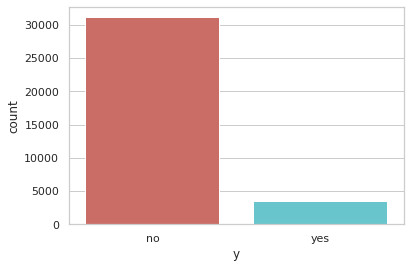

In [199]:
sns.countplot(x='y',data=market, palette='hls')
plt.show()

In [174]:
market.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.644985,1283.617118,16.006421,221.006870,2.891036,33.755297,0.456883
yes,41.031649,1739.012485,15.231707,579.389082,2.234611,55.710511,0.942799


In [ ]:
# From the following analysing result, it is clear shown that

# 1- Age range for subscribers are higher than non-subscribers.
# 2- Bank statement Balance of subscribers are higher than non-subscribers.
# 3- Subscribers contacts about 1 day fasters than non-subscribers.
# 4- The average durations of last contact are 2.6 times higher in subscrition group.
# Interestingly, on the otherhand,
# number of days that passed by after the last contacted the client 
# from a previous campaign is smaller
# 购买理财商品的用户的平均pdays(自上次联系客户以来的日子)
# 要小于未购买的用户的平均pdays, 这是合理的，因为pdays越小
# 最后一次通话的日子越近，用户对理财产品的记忆越强,因此销售的机会就越大。
# 购买理财商品的用户的平均campaign(与用户电话联系的次数)要是小于未购买的用户的平均campaign。


In [175]:
# The 3 variables about job,marita，education are shown below
market.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.134551,1095.497041,15.724466,245.350141,2.643170,42.946231,0.556728
blue-collar,39.982932,1075.741238,15.522476,261.625668,2.849121,41.763257,0.479870
entrepreneur,41.702929,1313.573222,15.728870,256.521339,2.791632,29.635983,0.397490
housemaid,46.153518,1421.872068,15.963753,241.698294,2.804904,17.672708,0.256930
management,40.410825,1718.846578,16.235092,252.951797,2.945600,32.981132,0.594271
retired,59.839812,1984.504021,15.587131,275.568365,2.463807,29.550268,0.467828
self-employed,40.520292,1567.720779,16.128247,270.784091,2.893669,31.423701,0.513799
services,38.643232,988.799260,15.680543,258.269504,2.765032,39.062596,0.444650
student,26.892675,1334.185690,15.187394,244.045997,2.277683,50.183986,0.887564


In [176]:
market.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.126397,1086.066054,15.938416,259.537373,2.712441,37.474298,0.484480
married,42.979372,1406.419922,15.968580,251.615557,2.906456,33.961226,0.482237
single,33.827808,1262.021303,15.839967,266.533098,2.697288,39.608438,0.564065


In [177]:
market.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,45.130666,1218.674948,15.446425,251.364119,2.875972,33.330173,0.423099
secondary,39.750645,1142.109584,15.906464,257.475816,2.756930,38.383964,0.498204
tertiary,39.513404,1694.851123,16.229202,258.231180,2.902265,33.704422,0.574933
unknown,44.288184,1482.179395,15.872478,255.548991,2.959654,30.785303,0.400576


Text(0, 0.5, 'Quntitives')

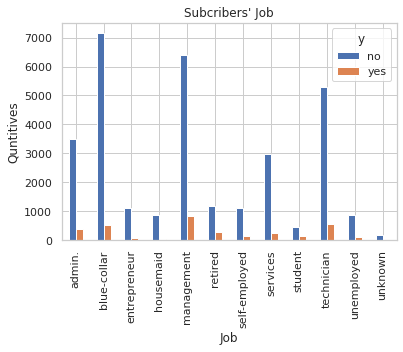

In [180]:
# Variable Visualization
pd.crosstab(market.job,market.y).plot(kind='bar')
plt.title("Subcribers' Job")
plt.xlabel('Job')
plt.ylabel('Quntitives')

In [ ]:
# It is clear to see that the number of term deposit is various by works.
# Management is the top buyers, but the non-subscribers are ranking as second.
# *****Meanwhile there is a huge oppotunities in management and technician.
# Numbers in blue-collar, admin are relatively large.

y            no   yes
marital              
divorced   3620   407
married   19144  1798
single     8384  1239


Text(0, 0.5, 'Client Ratio')

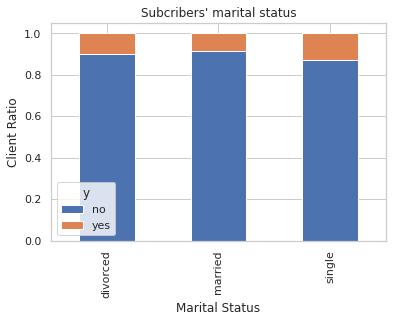

In [181]:
table=pd.crosstab(market.marital,market.y)
print(table)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Subcribers' marital status stacked-chart")
plt.xlabel('Marital Status')
plt.ylabel('Client Ratio')

In [ ]:
# Marital status doesn't show strong relative for subsribers' preference.
# Single/Divorced people are more likely make a term deposit. 

y             no   yes
education             
primary     4889   384
secondary  16198  1624
tertiary    8821  1288
unknown     1240   148


Text(0, 0.5, 'Client Ratio')

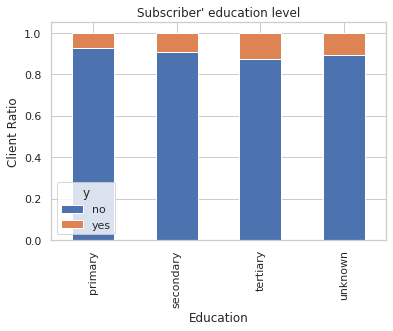

In [182]:
table=pd.crosstab(market.education,market.y)
print(table)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Subscriber' education stacked-chart")
plt.xlabel('Education')
plt.ylabel('Client Ratio')

y         no  yes
month            
apr     1820  429
aug     4252  406
dec       51   43
feb     1702  286
jan      960   66
jul     5014  434
jun     3850  393
mar      147  162
may    10189  691
nov     2842  258
oct      196  155
sep      125  121


Text(0, 0.5, 'Quality')

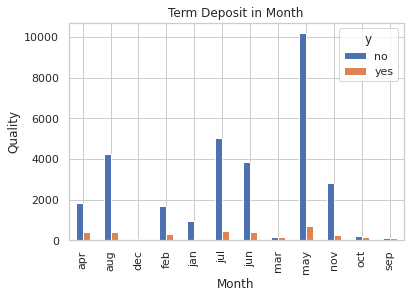

In [197]:
print(pd.crosstab(market.month,market.y))
pd.crosstab(market.month,market.y).plot(kind='bar')
plt.title('Term Deposit in Month')
plt.xlabel('Month')
plt.ylabel('Quality')

In [ ]:
# On holiday season, December, it is unlikely for people to make a term deposit.

Text(0, 0.5, 'Frequentcy')

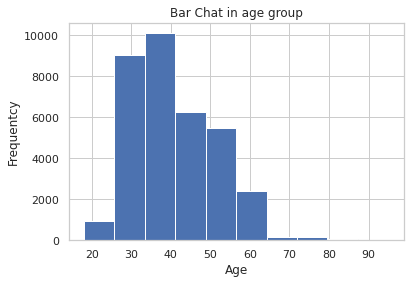

In [198]:
market.age.hist()
plt.title('Histogram for age group')
plt.xlabel('Age')
plt.ylabel('Frequentcy')

y            no   yes
poutcome             
failure    3146   363
other      1081   174
success     282   468
unknown   26639  2439


Text(0, 0.5, 'Quntity')

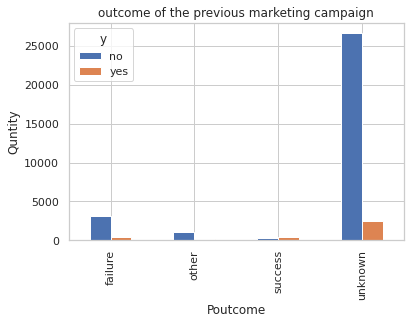

In [201]:
print(pd.crosstab(market.poutcome,market.y))
pd.crosstab(market.poutcome,market.y).plot(kind='bar')
plt.title('outcome of the previous marketing campaign')
plt.xlabel('Poutcome')
plt.ylabel('Quntity')

In [202]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34592 entries, 0 to 39963
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        34592 non-null  float64
 1   job        34592 non-null  object 
 2   marital    34592 non-null  object 
 3   education  34592 non-null  object 
 4   default    34592 non-null  object 
 5   balance    34592 non-null  int64  
 6   housing    34592 non-null  object 
 7   loan       34592 non-null  object 
 8   contact    34592 non-null  object 
 9   day        34592 non-null  int64  
 10  month      34592 non-null  object 
 11  duration   34592 non-null  int64  
 12  campaign   34592 non-null  int64  
 13  pdays      34592 non-null  int64  
 14  previous   34592 non-null  int64  
 15  poutcome   34592 non-null  object 
 16  y          34592 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.8+ MB
